In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [151]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [152]:
# Load the dataset
df = pd.read_csv('../data/telegram_data.csv')

In [153]:
df.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14845,ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...,2024-09-28 17:48:50+00:00,photos\@sinayelj_14845.jpg
1,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14844,ክቡራን ደምበኞቻችን ዛሬ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ሙሉ...,2024-09-27 08:02:52+00:00,photos\@sinayelj_14844.jpg
2,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14843,ለመላው የክርስትና እምነት ተከታዮች በሙሉ እንኳን ለመስቀል ደመራ በዓል ...,2024-09-27 07:38:57+00:00,photos\@sinayelj_14843.jpg
3,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14841,NaN,2024-09-26 12:24:51+00:00,photos\@sinayelj_14841.jpg
4,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14840,NaN,2024-09-26 12:24:51+00:00,photos\@sinayelj_14840.jpg


In [154]:
# check for missing values
df.isnull().sum()

Channel Title         0
Channel Username      0
ID                    0
Message             170
Date                  0
Media Path            8
dtype: int64

In [155]:
df = df.dropna(subset=['Message'])

In [156]:
df.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14845,ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...,2024-09-28 17:48:50+00:00,photos\@sinayelj_14845.jpg
1,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14844,ክቡራን ደምበኞቻችን ዛሬ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ሙሉ...,2024-09-27 08:02:52+00:00,photos\@sinayelj_14844.jpg
2,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14843,ለመላው የክርስትና እምነት ተከታዮች በሙሉ እንኳን ለመስቀል ደመራ በዓል ...,2024-09-27 07:38:57+00:00,photos\@sinayelj_14843.jpg
5,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14839,ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...,2024-09-26 12:24:51+00:00,photos\@sinayelj_14839.jpg
9,SINA KIDS/ሲና ኪድስⓇ,@sinayelj,14835,Baby romper ከላዩ ፈር ውስጡ ኮተን የሆነ\n\n2000 birr\...,2024-09-26 12:24:11+00:00,photos\@sinayelj_14835.jpg


In [157]:
df.isnull().sum()

Channel Title       0
Channel Username    0
ID                  0
Message             0
Date                0
Media Path          3
dtype: int64

In [158]:
Message_df = df['Message']
Message_df.head(50)

0      ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...
1      ክቡራን ደምበኞቻችን ዛሬ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ሙሉ...
2      ለመላው የክርስትና እምነት ተከታዮች በሙሉ እንኳን ለመስቀል ደመራ በዓል ...
5      ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...
9      Baby romper   ከላዩ ፈር ውስጡ ኮተን የሆነ\n\n2000 birr\...
12     Chicco 5 in 1 mama bag\nኦሪጅናል ማቴሪያል\nበሳይዙ ትልቅ\...
19     aiebao HIP SEAT CARRIER\nምቹ ጠንካራ የልጆች ማዘያ\nበተለ...
29     Kids mat  \n\n💥4100 ብር\n\nSize 1.80*2m\n\nfree...
34     Wearable breast milk collector\n\nWearable bre...
35     ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...
39     Double layer lunch box \nwith dipping jar \n\n...
42     50 pcs balls \n\n1700 birr \n\n0909003864\n090...
46     Infantino baby carier\nባለ ኮፉያ ምቹ ማዘያ\nበ 3 አቅጣጫ...
55     Mastela deluxe multi-functional bassinet\nአልቋል...
57     ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...
64     👌world's number one high-quality multifunction...
65     ክቡራን ደምበኞቻችን ነገ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከጠ...
66     ውድ የሲና ኪድስ ቤተሰቦች እንኳን ለ2

In [159]:
import re

def remove_emojis(text):
        """Removes all emojis from text."""
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F" 
            "\U0001F300-\U0001F5FF" 
            "\U0001F680-\U0001F6FF"  
            "\U0001F700-\U0001F77F"  
            "\U0001F1E0-\U0001F1FF"   
            "\U00002500-\U00002BEF"  
            "\U00002702-\U000027B0"  
            "\U0001F900-\U0001F9FF"  
            "\U00002600-\U000026FF"  
             "\u0031\uFE0F\u20E3"     
            "]+", 
            flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', text)


df['Message'] = df['Message'].apply(remove_emojis)
#display the updated df
print(df['Message'].head(10))


0     ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...
1     ክቡራን ደምበኞቻችን ዛሬ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ሙሉ...
2     ለመላው የክርስትና እምነት ተከታዮች በሙሉ እንኳን ለመስቀል ደመራ በዓል ...
5     ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተ...
9     Baby romper   ከላዩ ፈር ውስጡ ኮተን የሆነ\n\n2000 birr\...
12    Chicco 5 in  mama bag\nኦሪጅናል ማቴሪያል\nበሳይዙ ትልቅ\n...
19    aiebao HIP SEAT CARRIER\nምቹ ጠንካራ የልጆች ማዘያ\nበተለ...
29    Kids mat  \n\n400 ብር\n\nSize .80*2m\n\nfree de...
34    Wearable breast milk collector\n\nWearable bre...
35    ክቡራን ደምበኞቻችን እሁድ ገርጂ እና ብስራተ ገብሬል የሚገኘው ሱቃችን ከ...
Name: Message, dtype: object


In [160]:
df.to_csv('../data/clean_data.csv')

In [161]:
df.shape

(56, 6)

In [163]:
def label_message(message):
        """Labels messages with prices, locations, and kids products using a rule-based approach."""
        # Define multi-word entities (locations, products, etc.)
        multi_word_entities = {
            'ብስራተ ገብርኤል': 'I-LOC',
        }
        price = ['ብር', 'ETB', '$', 'Birr'],
        location = ['ገርጂ', '4ኪሎ', 'ብስራተ ገብርኤል'],
        kinds = ['toy', 'children', 'kids', 'መጫወቻ', 'play', 'games', 'fun', 'educational', 
                'puzzle', 'doll', 'action figure', 'stuffed animal', 'arts and crafts', 
                'books', 'outdoor toys', 'building blocks', 'baby', 'toddler', 'Baby', 
                'መጫወቻዎች']

        # First, check for multi-word entities in the message
        for entity, label in multi_word_entities.items():
            if entity in message:
                message = message.replace(entity, f"{entity.replace(' ', '_')}")  # Replace spaces with underscores

        tokens = re.findall(r'\S+', message)  # Tokenize after replacing multi-word entities
        labeled_tokens = []

        for token in tokens:
            if token.startswith('@'):
                continue  # Skip usernames

            # After tokenizing, replace underscores with spaces again for multi-word entities
            token = token.replace('_', ' ')

            # Check if token is a multi-word entity (location, product, etc.)
            if token in multi_word_entities:
                labeled_tokens.append(f"{token} {multi_word_entities[token]}")
            # Check if token is a location (single-word locations)
            elif any(loc in token for loc in ['ገርጂ', '4ኪሎ']):
                labeled_tokens.append(f"{token} I-LOC")
            # Check if token is a phone number (exclude numbers longer than 9 digits)
            elif re.match(r'^\+?\d{10,15}$', token):
                labeled_tokens.append(f"{token} O")
            # Check if token is a price (e.g., 500 ETB, $100, or ብር)
            elif re.match(r'^\d+(\.\d{1,2})?$', token) and len(token) < 9:
                labeled_tokens.append(f"{token} I-PRICE")
            elif 'ብር' in token or 'Birr' in token or 'ETB' in token:
                labeled_tokens.append(f"{token} I-PRICE")
            # Check if token matches kids products category
            elif any(token.lower() == item.lower() for item in kinds):
                labeled_tokens.append(f"{token} B-PRODUCT")
            # Otherwise, treat it as outside any entity
            else:
                labeled_tokens.append(f"{token} O")

        return "\n".join(labeled_tokens) , tokens
df['Labeled_Message'] = df['Message'].apply(label_message)
print(df['Labeled_Message'].head(5))


0    (ክቡራን O\nደምበኞቻችን O\nእሁድ O\nገርጂ I-LOC\nእና O\nብስ...
1    (ክቡራን O\nደምበኞቻችን O\nዛሬ O\nገርጂ I-LOC\nእና O\nብስራ...
2    (ለመላው O\nየክርስትና O\nእምነት O\nተከታዮች O\nበሙሉ O\nእንኳ...
5    (ለኮንዶሚኒየም O\nለጠባብ O\nቤቶች O\nገላግሌ O\nየሆነ O\nከንፁ...
9    (Baby B-PRODUCT\nromper O\nከላዩ O\nፈር O\nውስጡ O\...
Name: Labeled_Message, dtype: object


In [165]:
df['Labeled_Message'] = df['Message'].apply(label_message)
labeled_data_path = '../data/labeled_telegram_data.txt'
with open(labeled_data_path, 'w', encoding='utf-8') as f:
    for _, row in df.iterrows():
        f.write(f"{row['Labeled_Message']}\n\n")
print(f"Labeled data saved to {labeled_data_path}")

Labeled data saved to ../data/labeled_telegram_data.txt


In [164]:
df['Labeled_Message'] = df['Message'].apply(label_message)
labeled_data_path = '../data/labeled_telegram_data.conll'
with open(labeled_data_path, 'w', encoding='utf-8') as f:
    for _, row in df.iterrows():
        f.write(f"{row['Labeled_Message']}\n\n")
print(f"Labeled data saved to {labeled_data_path}")

Labeled data saved to ../data/labeled_telegram_data.conll


In [166]:
# Basic statistics
print("Total number of messages:", len(df))
print("Number of unique channels:", df['Channel Username'].nunique())

Total number of messages: 56
Number of unique channels: 1


In [168]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter

# Sample preprocessing function (you can expand it as needed)
def preprocess_dataset(records):
    preprocessed_records = []
    
    for record in records:
        
        # Assuming the text is in a field called 'message'
        message = record.get('Message', " ")
        # print(message)
        # Tokenize the message (modify for Amharic-specific preprocessing if needed)
        # tokens = word_tokenize(message)  # You can customize this with a more advanced tokenizer
        # tokens = re.findall(r'\S+', record)  # Tokenize after replacing multi-word entities
        tokens = re.findall(r'\S+', message)
        # Append the preprocessed record with tokens
        preprocessed_records.append({
            'message': message,
            'tokens': tokens
        })
    
    return preprocessed_records

# Sample dataframe (replace df with your actual DataFrame)
# df = pd.DataFrame({
#     'message': ['Hello world', 'This is a sample message']
# })

# # Convert DataFrame to a list of records (dictionaries)
# preprocessed_data = preprocess_dataset(df.to_dict('records'))

# # # Convert preprocessed data back to a DataFrame
# # preprocessed_df = pd.DataFrame(preprocessed_data)



# # Print the most common tokens
# print(token_counts.most_common(10))


In [179]:
# Convert preprocessed data back to a DataFrame
preprocessed_data = preprocess_dataset(df.to_dict('records'))

In [178]:
# Token analysis
all_tokens = [token for tokens in preprocessed_df['tokens'] for token in tokens]
token_counts = Counter(all_tokens)
# # Token analysis
# all_tokens = [token for tokens in df['tokens'] for token in tokens]
# token_counts = Counter(all_tokens)

In [176]:
print("Total number of tokens:", len(all_tokens))
print("Number of unique tokens:", len(token_counts))

Total number of tokens: 6224
Number of unique tokens: 1375


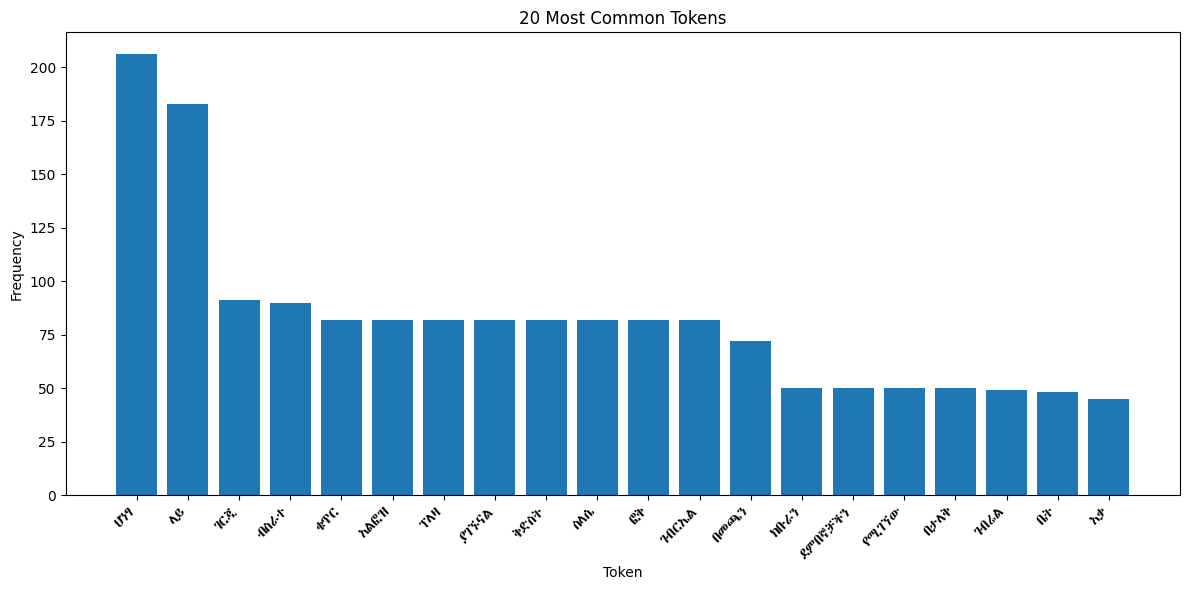

In [182]:
from matplotlib import font_manager
font='../data/washrab.ttf'
property = font_manager.FontProperties(fname=font)
plt.figure(figsize=(12, 6))
plt.bar(*zip(*token_counts.most_common(20)))
plt.title('20 Most Common Tokens')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=property)
plt.tight_layout()
plt.show()

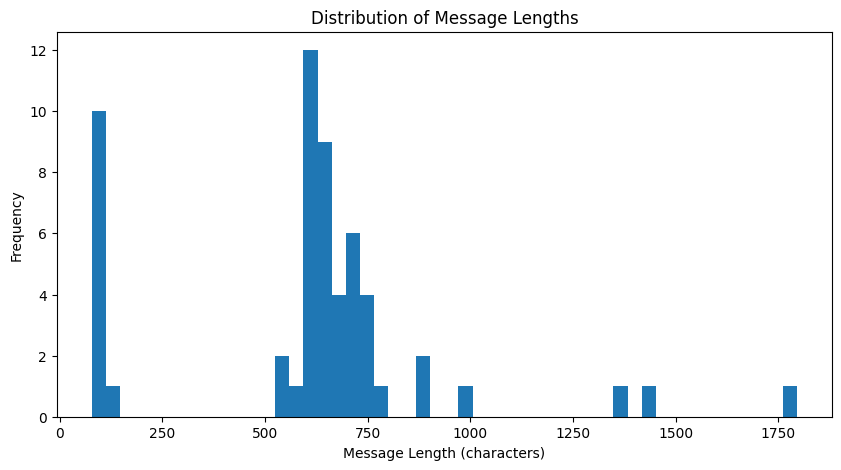

In [184]:
# Message length analysis
preprocessed_df['message_length'] = preprocessed_df['message'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(preprocessed_df['message_length'], bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.show()


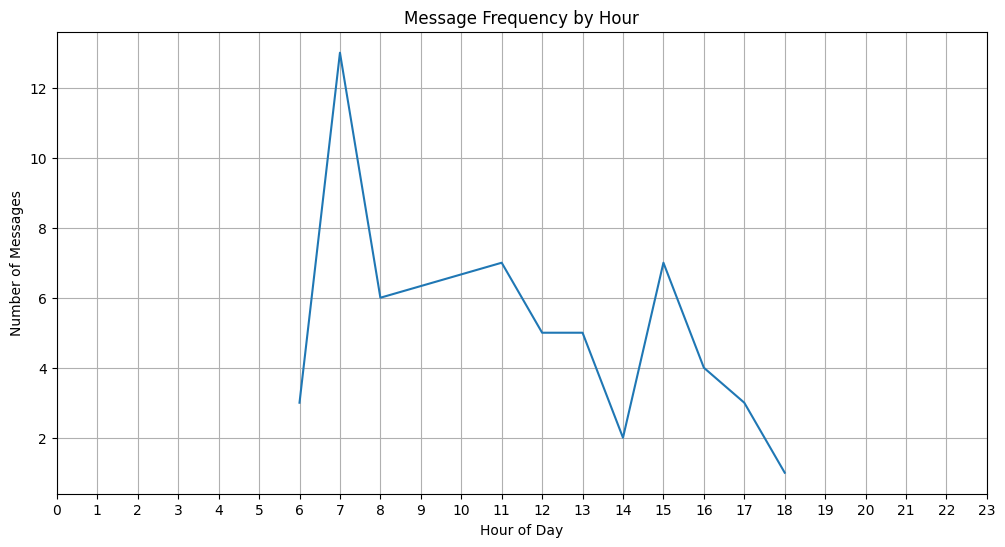

In [148]:
# Time analysis
df['Date'] = pd.to_datetime(df['Date'])
df['hour'] = df['Date'].dt.hour

hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Message Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

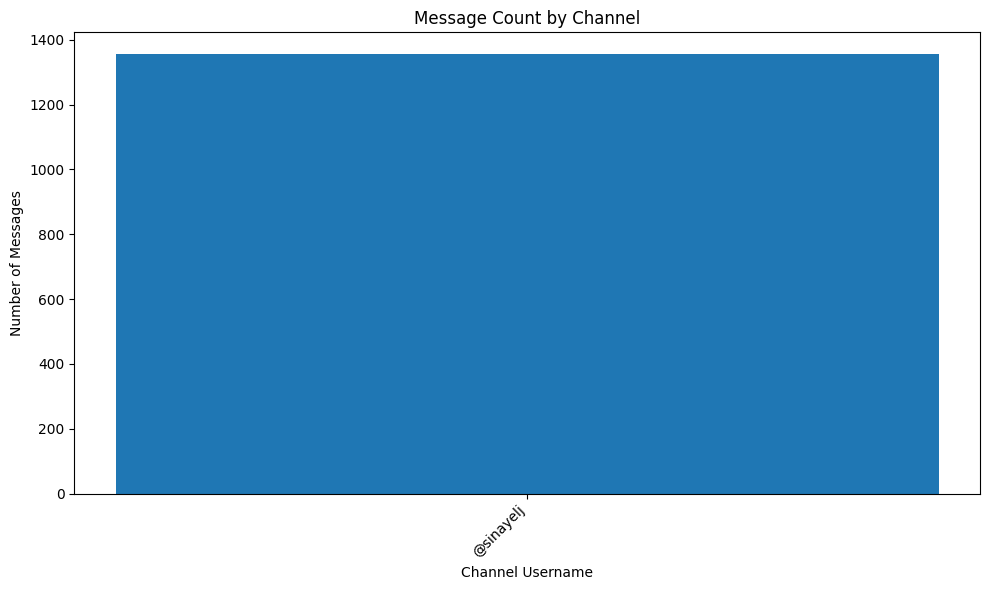

In [26]:
# Channel analysis
channel_counts = preprocessed_df['Channel_Username'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(channel_counts.index, channel_counts.values)
plt.title('Message Count by Channel')
plt.xlabel('Channel Username')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

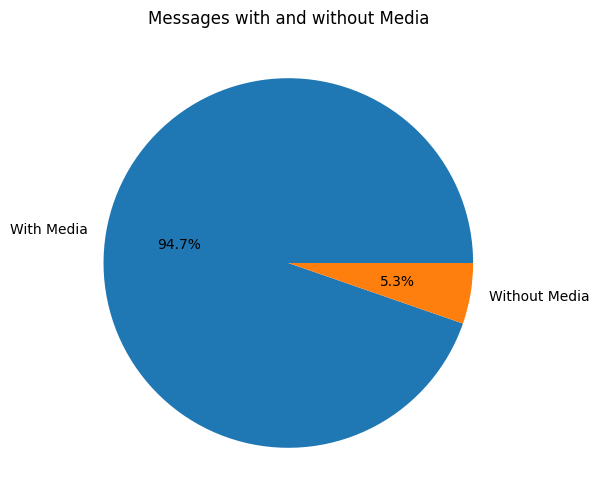

In [27]:
# Media analysis
media_counts = preprocessed_df['Media_Path'].notna().value_counts()
plt.figure(figsize=(8, 6))
plt.pie(media_counts, labels=['With Media', 'Without Media'], autopct='%1.1f%%')
plt.title('Messages with and without Media')
plt.show()